In [1]:
# Log in to <FS6T01@gmail.com> using password <CZ1015@FS6T01> to get the access code
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Getting our data into a pandas DataFrame. When it comes to submitting the project, need to change the file directory.
listings_data = pd.read_csv('/content/drive/My Drive/Mini Project/seattle/listings.csv')
listings_data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,...,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,...,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,...,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,NaN,NaN,

In [0]:
print("Data type : ", type(listings_data))
print("Data dims : ", listings_data.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (3818, 92)


# Data Cleaning (Testing)

In [0]:
split_data = pd.DataFrame(listings_data[['latitude', 'longitude', 'host_is_superhost', 'price', 'neighbourhood', 'property_type']])

split_data.head()

,latitude,longitude,host_is_superhost,price,neighbourhood,property_type
0,47.636289,-122.371025,f,$85.00,Queen Anne,Apartment
1,47.639123,-122.365666,t,$150.00,Queen Anne,Apartment
2,47.629724,-122.369483,f,$975.00,Queen Anne,House
3,47.638473,-122.369279,f,$100.00,Queen Anne,Apartment
4,47.632918,-122.372471,f,$450.00,Queen Anne,House


In [0]:
split_data.shape

(3818, 6)

In [0]:
#Remove all rows that contain an empty cell
split_data.dropna(axis = 0, how = "any", thresh = None, subset = None, inplace = False)

,latitude,longitude,host_is_superhost,price,neighbourhood,property_type
0,47.636289,-122.371025,f,$85.00,Queen Anne,Apartment
1,47.639123,-122.365666,t,$150.00,Queen Anne,Apartment
2,47.629724,-122.369483,f,$975.00,Queen Anne,House
3,47.638473,-122.369279,f,$100.00,Queen Anne,Apartment
4,47.632918,-122.372471,f,$450.00,Queen Anne,House
...,...,...,...,...,...,...
3811,47.657898,-122.346692,f,$65.00,Fremont,Apartment
3812,47.654516,-122.358124,t,$95.00,Fremont,Apartment
3813,47.664295,-122.359170,f,$359.00,Fremont,House
3814,47.649552,-122.318309,f,$79.00,Portage Bay,Apartment


# Data Exploratory

In [0]:
# Convert 'price' strings into 'float64'
listings_price = listings_data['price']

# First removing the '$' and ',' from prices e.g. "$1,000.00" becomes "1000.00"
listings_price = listings_price.str.replace('$', '')
listings_price = listings_price.str.replace(',', '')

# Next converting the column from 'object' into 'float64'
listings_price = listings_price.astype('float64')

In [0]:
listings_price.describe()

count    3818.000000
mean      127.976166
std        90.250022
min        20.000000
25%        75.000000
50%       100.000000
75%       150.000000
max      1000.000000
Name: price, dtype: float64

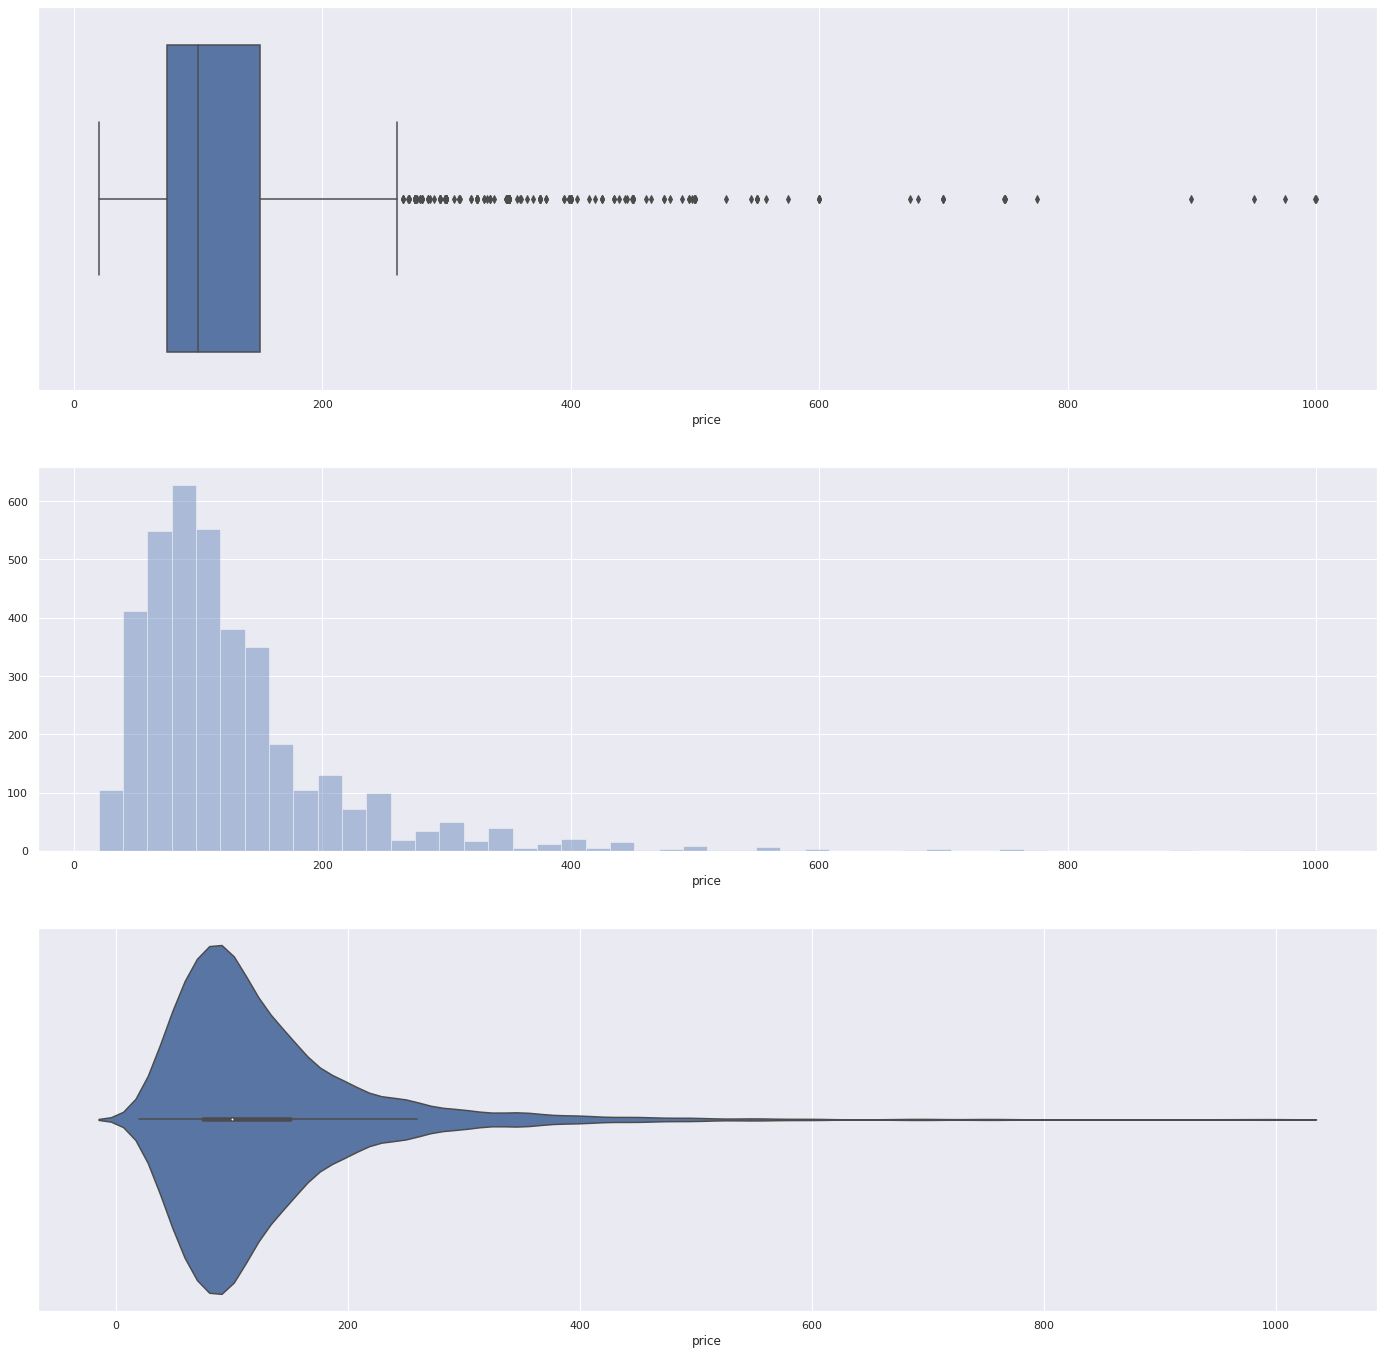

In [0]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(3, 1, figsize=(24, 24))

# Plot the basic uni-variate figures for price
sb.boxplot(listings_price, orient = "h", ax = axes[0])
sb.distplot(listings_price, kde = False, ax = axes[1])
sb.violinplot(listings_price, ax = axes[2])

# Trying out Clustering Patterns for the data set with longitude and latitude

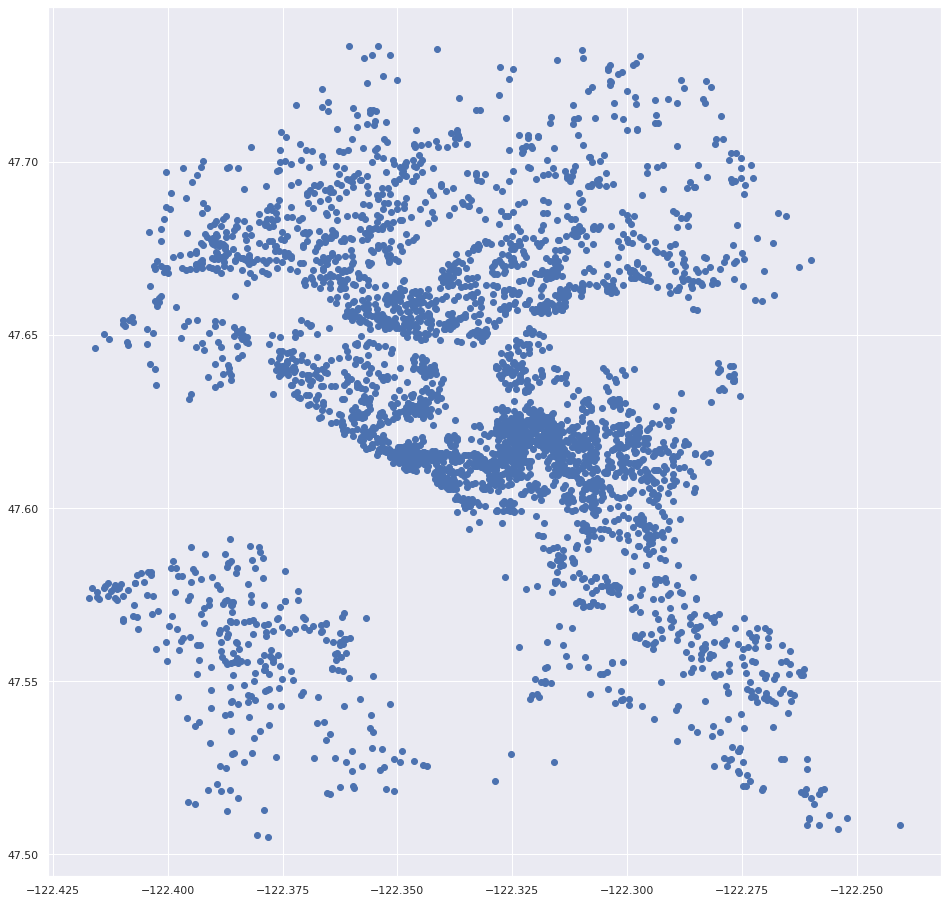

In [0]:
# Identifying clustering patterns for longitude vs latitude

# Extract the Features from the Data
X = pd.DataFrame(listings_data[["longitude", "latitude"]])

# Plot the Raw Data on a 2D grid
f, axes = plt.subplots(1, 1, figsize=(16,16))
plt.scatter(x = "longitude", y = "latitude", data = X)

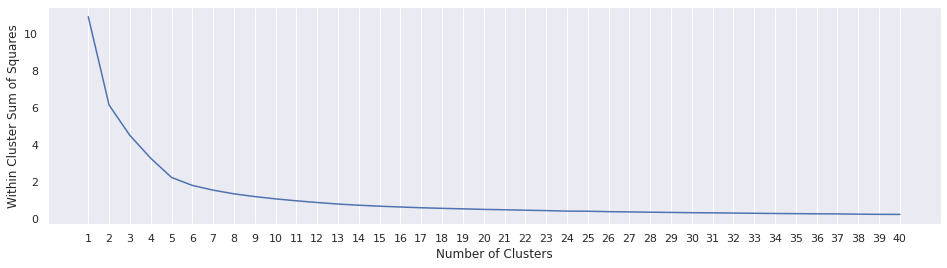

In [0]:
# Import KMeans from sklearn.cluster
from sklearn.cluster import KMeans

# Extract the Features from the Data
X = pd.DataFrame(listings_data[["longitude", "latitude"]])

# Vary the Number of Clusters
min_clust = 1
max_clust = 40

# Compute Within Cluster Sum of Squares
within_ss = []
for num_clust in range(min_clust, max_clust+1):
    kmeans = KMeans(n_clusters = num_clust)
    kmeans.fit(X)
    within_ss.append(kmeans.inertia_)

# Plot Within SS vs Number of Clusters
f, axes = plt.subplots(1, 1, figsize=(16,4))
plt.plot(range(min_clust, max_clust+1), within_ss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.xticks(np.arange(min_clust, max_clust+1, 1.0))
plt.grid(which='major', axis='y')
plt.show()

In [0]:
# Import KMeans from sklearn.cluster
from sklearn.cluster import KMeans

# Guess the Number of Clusters
num_clust = 5

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust)

# Fit the Clustering Model on the Data
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
# Print the Cluster Centers
print("Features", "\tlatitude", "\tlongitude")
print()

for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t\t")
    print()

Features 	latitude 	longitude

Cluster 0:	-122.32		47.62		
Cluster 1:	-122.37		47.67		
Cluster 2:	-122.38		47.56		
Cluster 3:	-122.29		47.56		
Cluster 4:	-122.31		47.68		


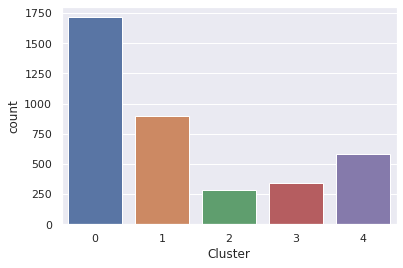

In [0]:
# Predict the Cluster Labels
labels = kmeans.predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.countplot(X_labeled["Cluster"])

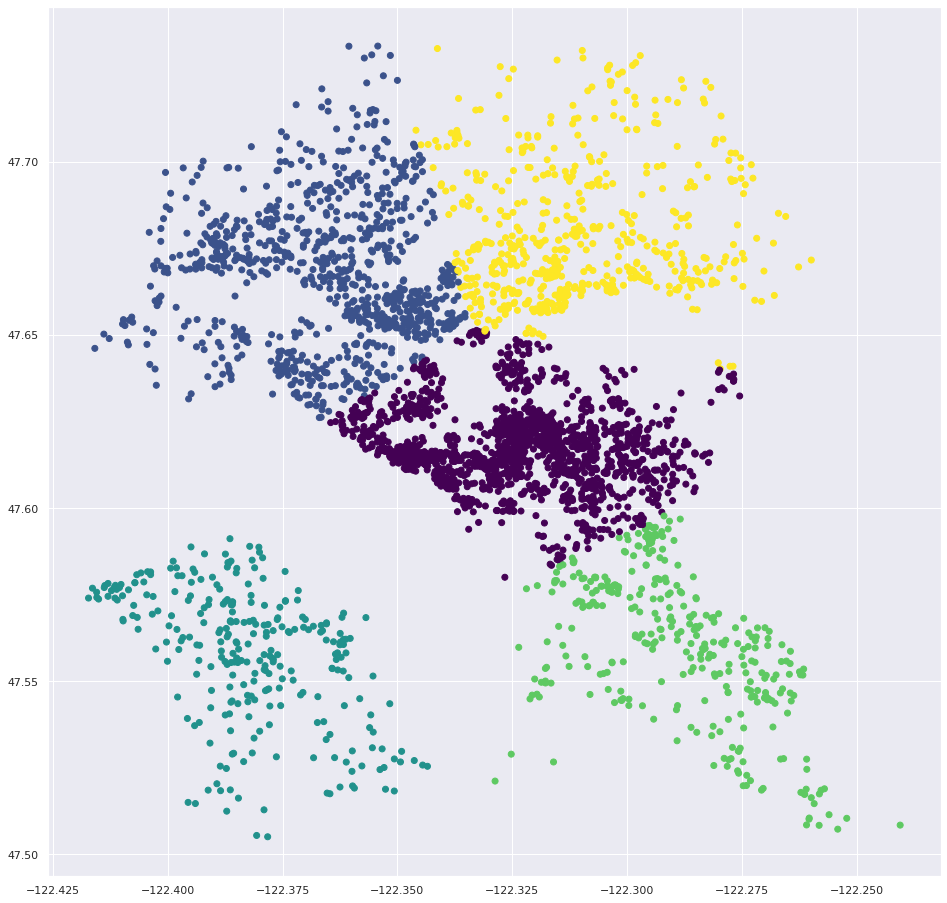

In [0]:
# Visualize the Clusters in the Data
f, axes = plt.subplots(1, 1, figsize=(16,16))
plt.scatter(x = "longitude", y = "latitude", c = "Cluster", cmap = 'viridis', data = X_labeled)

# Trying out Multi-Variate Linear Regression for plotting price against longitude and latitude. 
Can consider using log transformation.

As it is practice for a right-skewed distribution (from looking at violin plot from above).
<br><br>
We will start by setting up a Multi-Variate Linear Regression problem.

Response Variable : **log(price)**

Predictor Feature : **to be determined**

> Regression Model : log(price) =  a1   ×  <> +  a2   ×  <> +  b

In [0]:
listings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [0]:
log_price = np.log()

ValueError: ignored

# **Start** 

Exploring different variables that might affect pricing and using such variables to predict the listing price

## Initial Data Analysis

In [0]:
# import dataset -> listings_data 
# listings_data.head
listings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [0]:
print("Data type: ", type(listings_data))
print("Data dims: ", listings_data.shape)

Data type:  <class 'pandas.core.frame.DataFrame'>
Data dims:  (3818, 92)


In [0]:
#Getting all the columns with numeric types
number_variables = listings_data.select_dtypes(include=[np.number])
number_variables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              3818 non-null   int64  
 1   scrape_id                       3818 non-null   int64  
 2   host_id                         3818 non-null   int64  
 3   host_listings_count             3816 non-null   float64
 4   host_total_listings_count       3816 non-null   float64
 5   latitude                        3818 non-null   float64
 6   longitude                       3818 non-null   float64
 7   accommodates                    3818 non-null   int64  
 8   bathrooms                       3802 non-null   float64
 9   bedrooms                        3812 non-null   float64
 10  beds                            3817 non-null   float64
 11  square_feet                     97 non-null     float64
 12  guests_included                 38

## Getting superhost data

In [0]:
superhost = listings_data['host_is_superhost']
superhost.head()

0    f
1    t
2    f
3    f
4    f
Name: host_is_superhost, dtype: object

In [0]:
superhost.describe()

count     3816
unique       2
top          f
freq      3038
Name: host_is_superhost, dtype: object

In [0]:
#Getting the values of True and False
print(listings_data['host_is_superhost'].value_counts())

f    3038
t     778
Name: host_is_superhost, dtype: int64


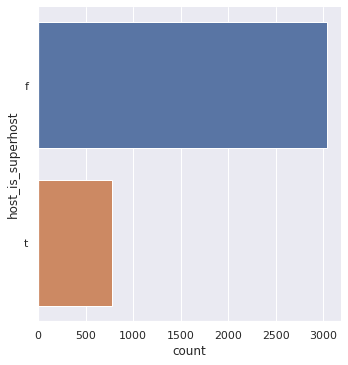

In [0]:
sb.catplot(y = "host_is_superhost", data = listings_data, kind = "count")

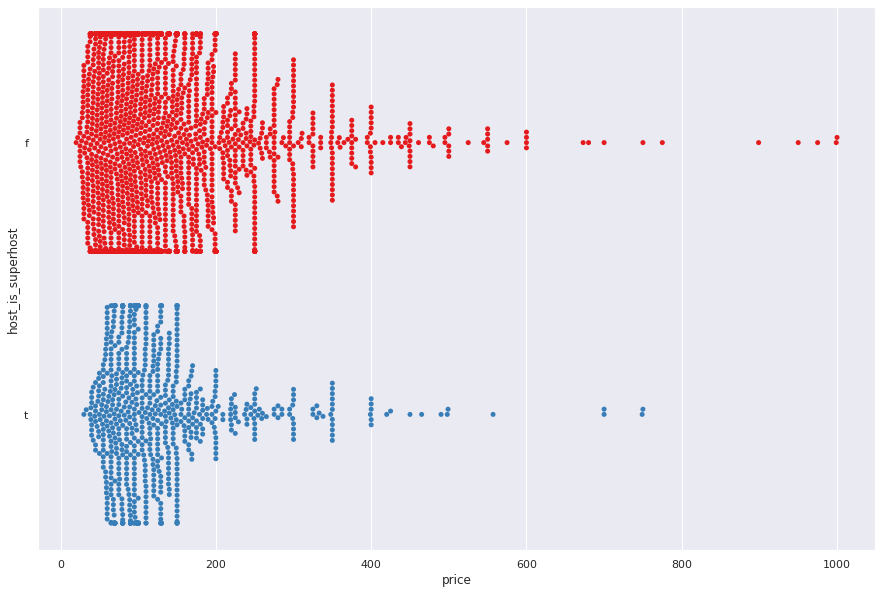

In [0]:
f, axes = plt.subplots(1, 1, figsize = (15, 10))
sb.swarmplot(x = listings_price, y = superhost, palette = "Set1")

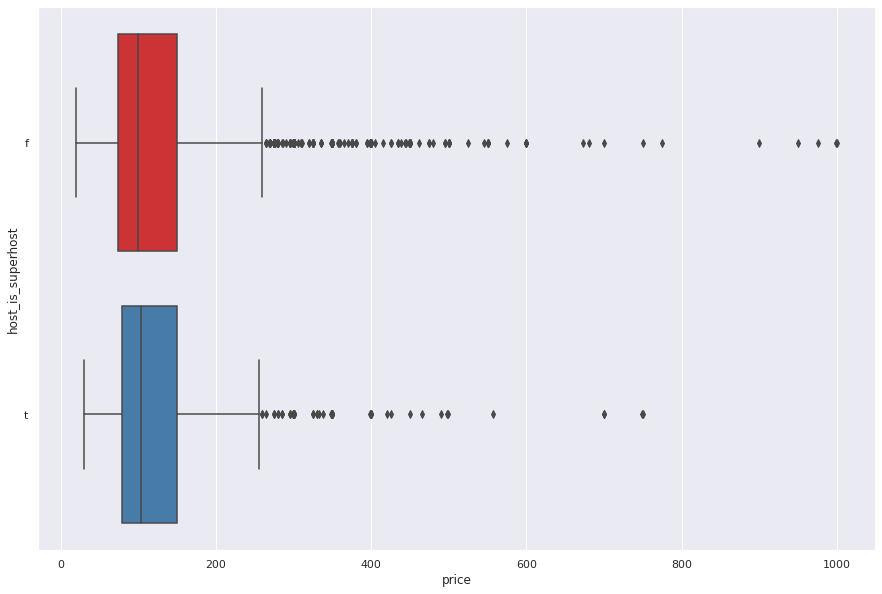

In [0]:
f, axes = plt.subplots(1, 1, figsize = (15, 10))
sb.boxplot(x = listings_price, y = superhost, palette = "Set1")

Through this analysis, we can see that the price of the lodging is not affected much by whether the host of the estate is a superhost. Although most of the hosts in the dataset are not superhost, the boxplot representations for both are very similar.

## Neighbourhood

In [0]:
neighbourhood_data = pd.DataFrame(listings_data[['neighbourhood_cleansed', 'neighbourhood_group_cleansed']])
neighbourhood_data.head()

,neighbourhood_cleansed,neighbourhood_group_cleansed
0,West Queen Anne,Queen Anne
1,West Queen Anne,Queen Anne
2,West Queen Anne,Queen Anne
3,West Queen Anne,Queen Anne
4,West Queen Anne,Queen Anne


In [0]:
# Printing out the percentage of missing values
(len(neighbourhood_data)-neighbourhood_data.count())/len(neighbourhood_data)*100

neighbourhood_cleansed          0.0
neighbourhood_group_cleansed    0.0
dtype: float64

Checking the distribution of listings by neighbourhoods

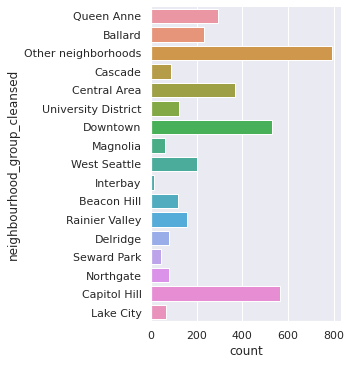

In [0]:
sb.catplot( y = 'neighbourhood_group_cleansed', kind = 'count', data = neighbourhood_data)

In [0]:
print("Number of neighbourhood groups: ", len(neighbourhood_data['neighbourhood_group_cleansed'].unique()))
print("\n")
print(neighbourhood_data['neighbourhood_group_cleansed'].value_counts())

Number of neighbourhood groups:  17


Other neighborhoods    794
Capitol Hill           567
Downtown               530
Central Area           369
Queen Anne             295
Ballard                230
West Seattle           203
Rainier Valley         159
University District    122
Beacon Hill            118
Cascade                 89
Northgate               80
Delridge                79
Lake City               67
Magnolia                61
Seward Park             44
Interbay                11
Name: neighbourhood_group_cleansed, dtype: int64


Not considering "other neighbourhoods" as those neighbourhooods are not categorised, the more popular neighbourhood groups are:

1. Capitol Hill  
2. Downtown  
3. Central Area  
4. Queen Anne  
5. Ballard  
6. West Seattle

## Exploring property type, room type and bed type



In [0]:
listing_types = pd.DataFrame(listings_data[['property_type', 'room_type', 'bed_type']])
listing_types.dtypes

property_type    object
room_type        object
bed_type         object
dtype: object

In [0]:
listing_types.describe()

,property_type,room_type,bed_type
count,3817,3818,3818
unique,16,3,5
top,House,Entire home/apt,Real Bed
freq,1733,2541,3657


In [0]:
# Printing out the percentage of missing values
(len(listing_types)-listing_types.count())/len(listing_types)*100

property_type    0.026192
room_type        0.000000
bed_type         0.000000
dtype: float64

In [0]:
listing_types.shape

(3818, 3)

In [0]:
#Data cleaning
#Removing rows with NULL values
listing_types.dropna(axis = 0, how = "any", thresh = None, subset = None, inplace = False)

,property_type,room_type,bed_type
0,Apartment,Entire home/apt,Real Bed
1,Apartment,Entire home/apt,Real Bed
2,House,Entire home/apt,Real Bed
3,Apartment,Entire home/apt,Real Bed
4,House,Entire home/apt,Real Bed
...,...,...,...
3813,House,Entire home/apt,Real Bed
3814,Apartment,Entire home/apt,Real Bed
3815,House,Entire home/apt,Real Bed
3816,Condominium,Entire home/apt,Real Bed


Property type

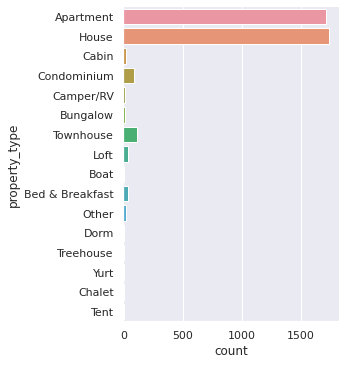

In [0]:
sb.catplot(y = "property_type", data = listing_types, kind = "count")

In [0]:
print(listing_types['property_type'].value_counts())

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Bungalow             13
Camper/RV            13
Boat                  8
Tent                  5
Treehouse             3
Dorm                  2
Chalet                2
Yurt                  1
Name: property_type, dtype: int64


Comparing property type with listings price

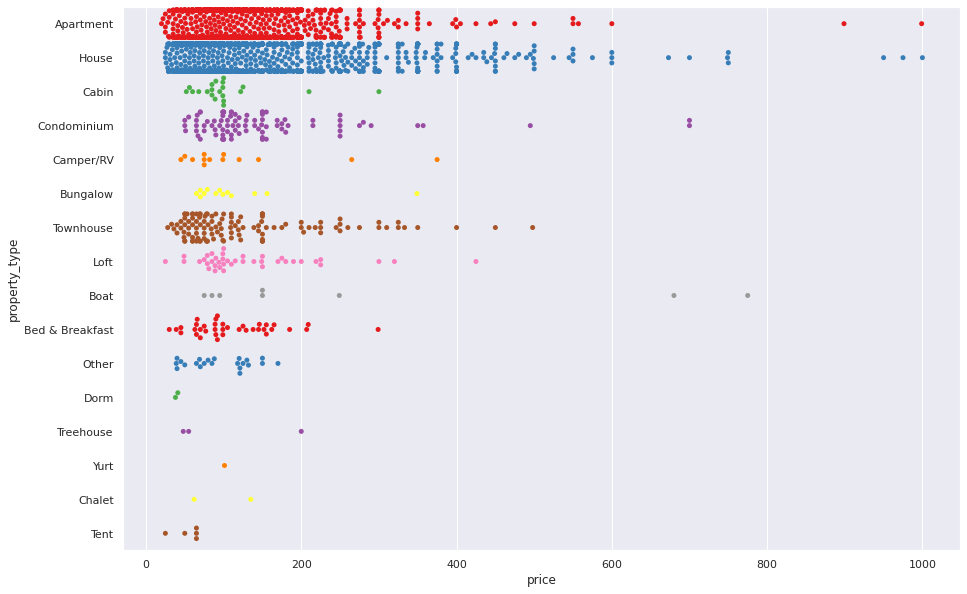

In [0]:
f, axes = plt.subplots(1, 1, figsize = (15, 10))
sb.swarmplot(x = listings_price, y = "property_type", data = listing_types, palette = "Set1")

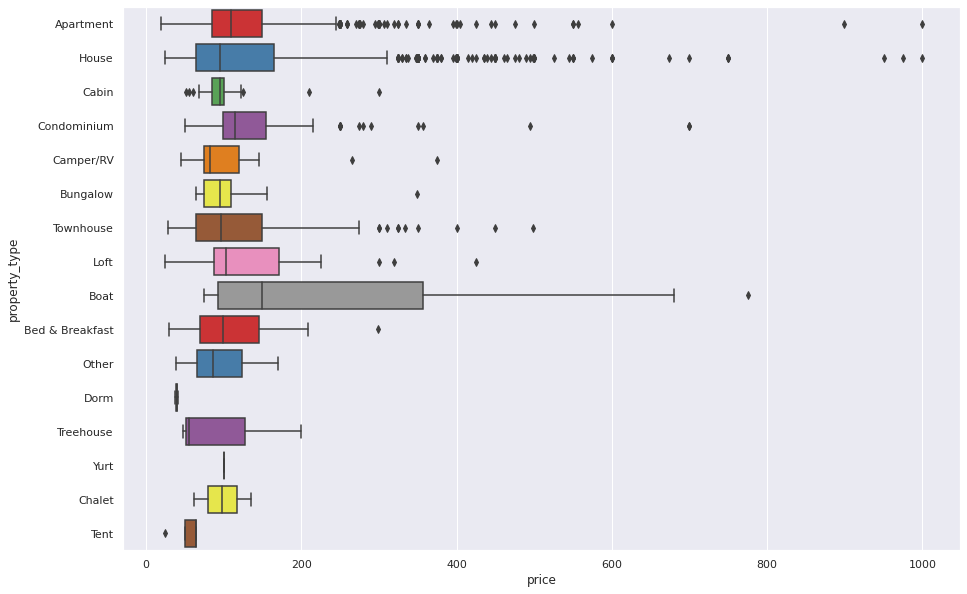

In [0]:
f, axes = plt.subplots(1, 1, figsize = (15, 10))
sb.boxplot(x = listings_price, y = "property_type", data = listing_types, palette = "Set1")

Room Type

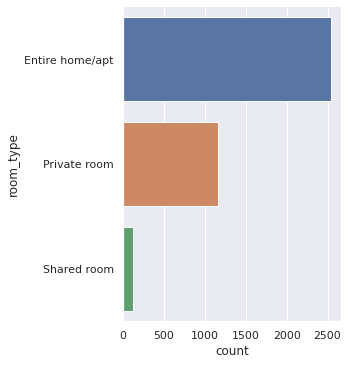

In [0]:
sb.catplot(y = "room_type", data = listing_types, kind = "count")

In [0]:
print(listing_types['room_type'].value_counts())

Entire home/apt    2541
Private room       1160
Shared room         117
Name: room_type, dtype: int64


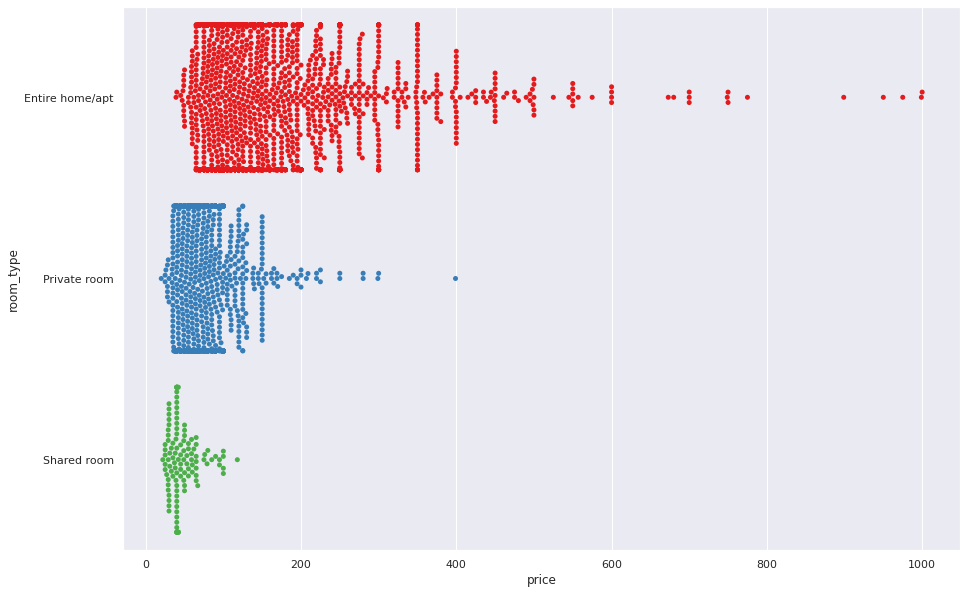

In [0]:
f, axes = plt.subplots(1, 1, figsize = (15, 10))
sb.swarmplot(x = listings_price, y = "room_type", data = listing_types, palette = "Set1")

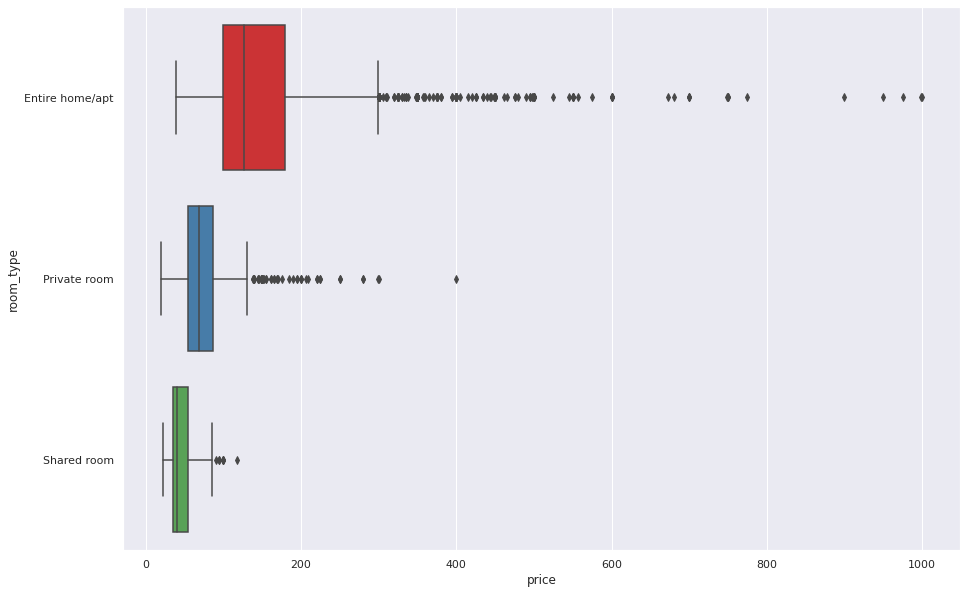

In [0]:
f, axes = plt.subplots(1, 1, figsize = (15, 10))
sb.boxplot(x = listings_price, y = "room_type", data = listing_types, palette = "Set1")

Bed Type

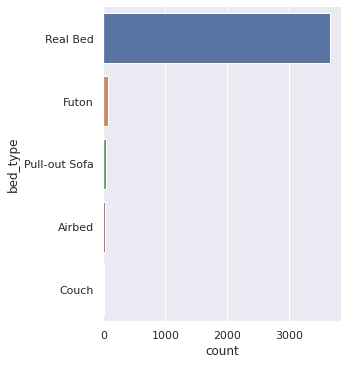

In [0]:
sb.catplot(y = "bed_type", data = listing_types, kind = "count")

In [0]:
print(listing_types['bed_type'].value_counts())

Real Bed         3657
Futon              74
Pull-out Sofa      47
Airbed             27
Couch              13
Name: bed_type, dtype: int64


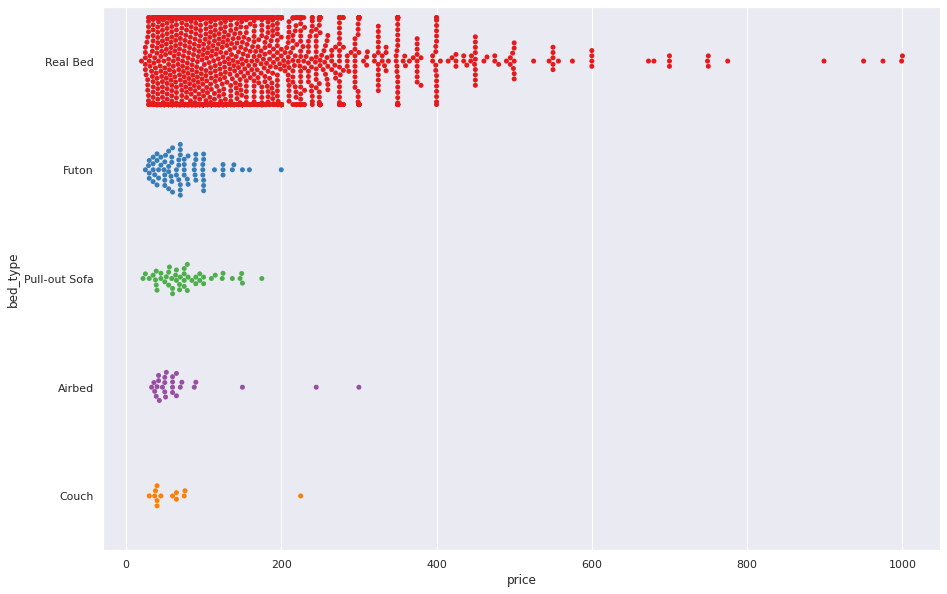

In [0]:
f, axes = plt.subplots(1, 1, figsize = (15, 10))
sb.swarmplot(x = listings_price, y = "bed_type", data = listing_types, palette = "Set1")

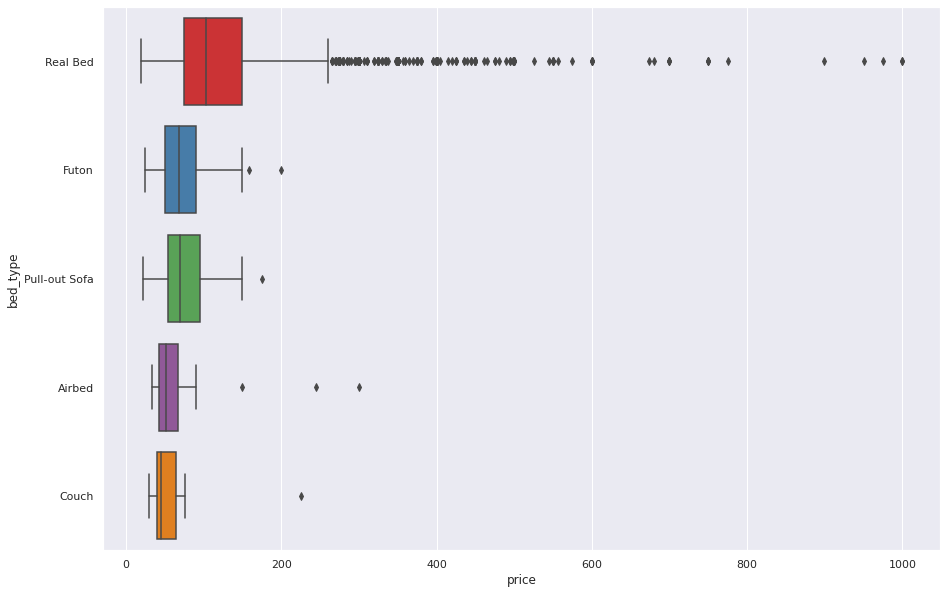

In [0]:
f, axes = plt.subplots(1, 1, figsize = (15, 10))
sb.boxplot(x = listings_price, y = "bed_type", data = listing_types, palette = "Set1")

**Room Type definitely affects the listing price**

## Getting Review Score Rating Data

In [0]:
price_reviews_corrData = pd.DataFrame(listings_data[['price', 'number_of_reviews']])
price_reviews_corrData.head()

,price,number_of_reviews
0,$85.00,207
1,$150.00,43
2,$975.00,20
3,$100.00,0
4,$450.00,38


In [0]:
#Data Cleaning
price_reviews_corrData['price'] = price_reviews_corrData['price'].str.replace('$', '')
price_reviews_corrData['price'] = price_reviews_corrData['price'].str.replace(',', '').astype('float64')
price_reviews_corrData.head()

,price,number_of_reviews
0,85.0,207
1,150.0,43
2,975.0,20
3,100.0,0
4,450.0,38


In [0]:
price_reviews_corrData.shape

(3818, 2)

In [0]:
#Data cleaning
#Removing rows with NULL values
price_reviews_corrData.dropna(axis = 0, how = "any", thresh = None, subset = None, inplace = False)

,price,number_of_reviews
0,85.0,207
1,150.0,43
2,975.0,20
3,100.0,0
4,450.0,38
...,...,...
3813,359.0,1
3814,79.0,2
3815,93.0,0
3816,99.0,0


In [0]:
price_reviews_corrData.describe()

,price,number_of_reviews
count,3818.000000,3818.000000
mean,127.976166,22.223415
std,90.250022,37.730892
min,20.000000,0.000000
25%,75.000000,2.000000
50%,100.000000,9.000000
75%,150.000000,26.000000
max,1000.000000,474.000000


Text(0.5, 0, 'Number of reviews')

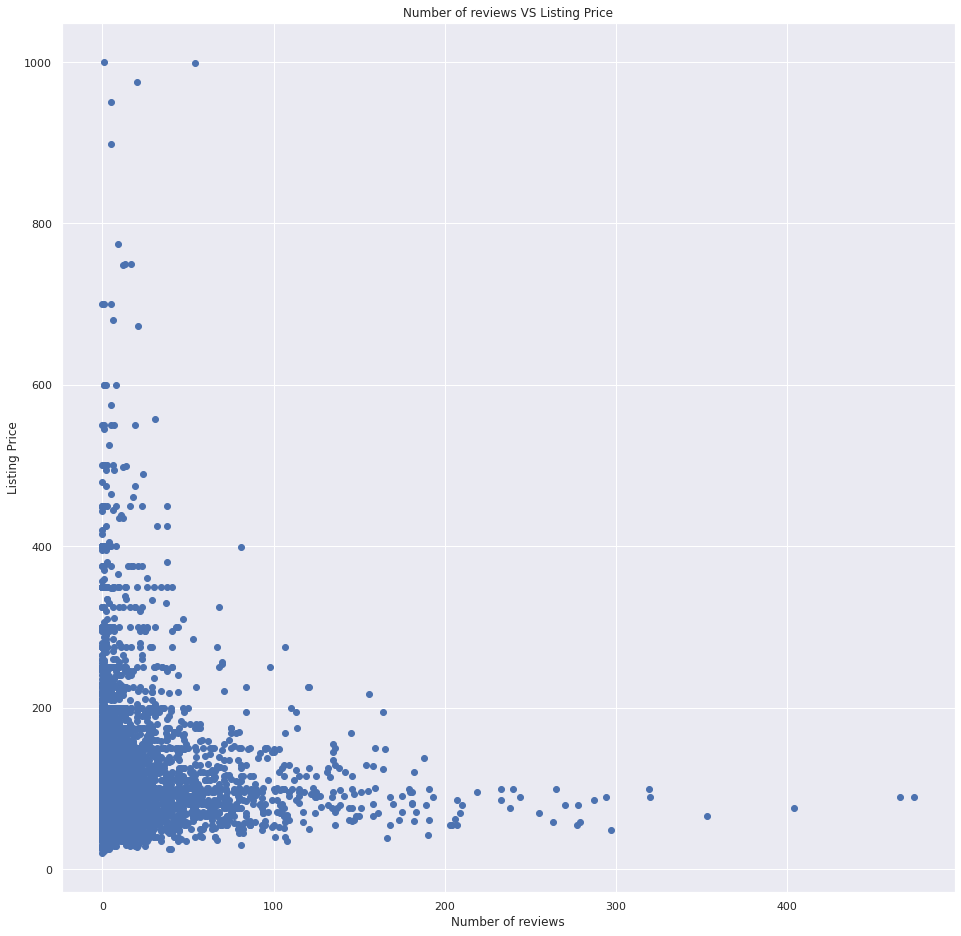

In [0]:
f, axes = plt.subplots(1, 1, figsize=(16,16))
plt.scatter(x = 'number_of_reviews', y = 'price', data = price_reviews_corrData)
plt.title("Number of reviews VS Listing Price")
plt.ylabel("Listing Price")
plt.xlabel("Number of reviews")

In [0]:
price_reviews_corrData.corr()

,price,number_of_reviews
price,1.000000,-0.124695
number_of_reviews,-0.124695,1.000000


Number of reviews do not really affect the listing price.

## Using Numeric Variables (to compare with price)

Using variables "accommodates", "bathrooms", "bedrooms", "beds", "square_feet", "guests_included" to predict the price

In [0]:
num_variables = pd.DataFrame(listings_data[['price', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'square_feet', 'guests_included']])
num_variables.head()

,price,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included
0,$85.00,4,1.0,1.0,1.0,NaN,2
1,$150.00,4,1.0,1.0,1.0,NaN,1
2,$975.00,11,4.5,5.0,7.0,NaN,10
3,$100.00,3,1.0,0.0,2.0,NaN,1
4,$450.00,6,2.0,3.0,3.0,NaN,6


In [0]:
num_variables.shape

(3818, 7)

In [0]:
#Data Cleaning
num_variables['price'] = num_variables['price'].str.replace('$', '')
num_variables['price'] = num_variables['price'].str.replace(',', '').astype('float64')

In [0]:
# Printing out the percentage of missing values
(len(num_variables)-num_variables.count())/len(num_variables)*100

price               0.000000
accommodates        0.000000
bathrooms           0.419068
bedrooms            0.157150
beds                0.026192
square_feet        97.459403
guests_included     0.000000
dtype: float64

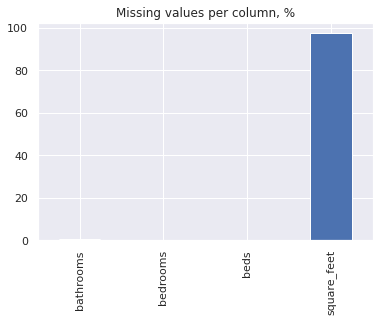

In [0]:
#Visualizing the percentage of missing values

#find percentage of missing values for each column
num_variables_missing = num_variables.isnull().mean()*100

#filter out only columns, which have missing values
num_variables_columns_with_nan = num_variables_missing[num_variables_missing > 0]

#plot the results
num_variables_columns_with_nan.plot.bar(title='Missing values per column, %')

Here we have the percentage of the elements in each variables that are missing from the Dataset. With "square_feet" having a high percentage (estimated at 97.5%) of data elements missing from the dataset, we will not use "square_feet".

In [0]:
num_variables = num_variables.drop("square_feet" ,axis=1)
num_variables.head()

,price,accommodates,bathrooms,bedrooms,beds,guests_included
0,85.0,4,1.0,1.0,1.0,2
1,150.0,4,1.0,1.0,1.0,1
2,975.0,11,4.5,5.0,7.0,10
3,100.0,3,1.0,0.0,2.0,1
4,450.0,6,2.0,3.0,3.0,6


In [0]:
#Removing rows with NULL values
num_variables_new = num_variables.dropna(axis = 0, how = "any", thresh = None, subset = None, inplace = False)
num_variables_new.head()

,price,accommodates,bathrooms,bedrooms,beds,guests_included
0,85.0,4,1.0,1.0,1.0,2
1,150.0,4,1.0,1.0,1.0,1
2,975.0,11,4.5,5.0,7.0,10
3,100.0,3,1.0,0.0,2.0,1
4,450.0,6,2.0,3.0,3.0,6


In [0]:
num_variables_new.shape

(3796, 6)

In [0]:
num_variables.shape

(3818, 6)

In [0]:
len(num_variables) - len(num_variables_new)

22

22 rows have been dropped

"square_feet" have been droppped

### Data Exploratory

In [0]:
# Extracting individual data columns
price_data = pd.DataFrame(num_variables_new['price'])
accommodates_data = pd.DataFrame(num_variables_new['accommodates'])
bathrooms_data = pd.DataFrame(num_variables_new['bathrooms'])
bedrooms_data = pd.DataFrame(num_variables_new['bedrooms'])
beds_data = pd.DataFrame(num_variables_new['beds'])
guests_data = pd.DataFrame(num_variables_new['guests_included'])

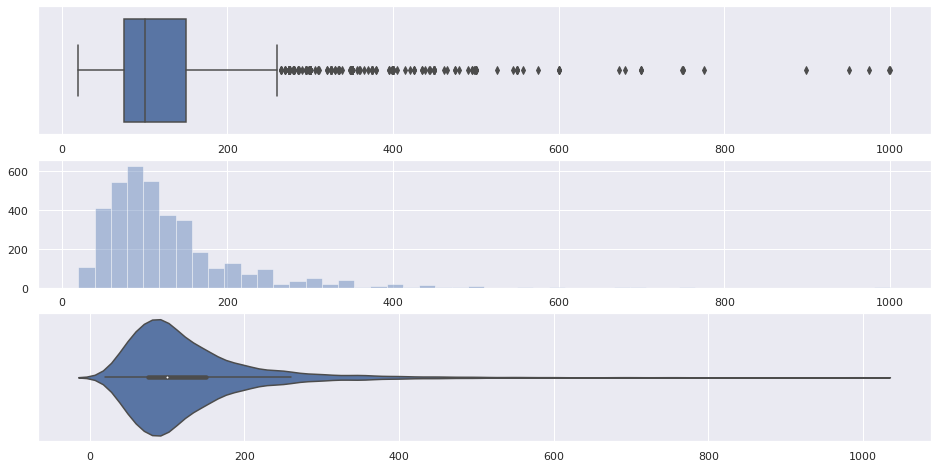

In [0]:
# Data Exploration for price_data
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(3, 1, figsize=(16, 8))

# Plot the basic uni-variate figures for price
sb.boxplot(price_data, orient = "h", ax = axes[0])
sb.distplot(price_data, kde = False, ax = axes[1])
sb.violinplot(price_data, ax = axes[2])

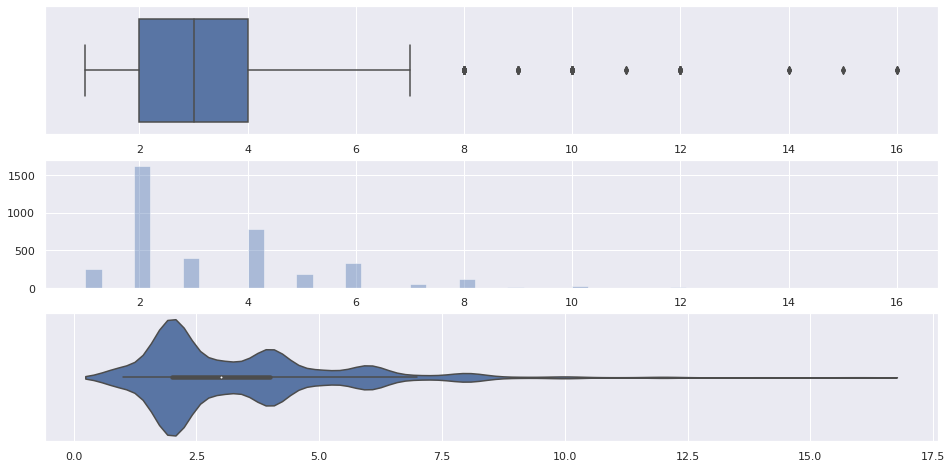

In [0]:
# Data Exploration for accommodates_data
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(3, 1, figsize=(16, 8))

# Plot the basic uni-variate figures for price
sb.boxplot(accommodates_data, orient = "h", ax = axes[0])
sb.distplot(accommodates_data, kde = False, ax = axes[1])
sb.violinplot(accommodates_data, ax = axes[2])

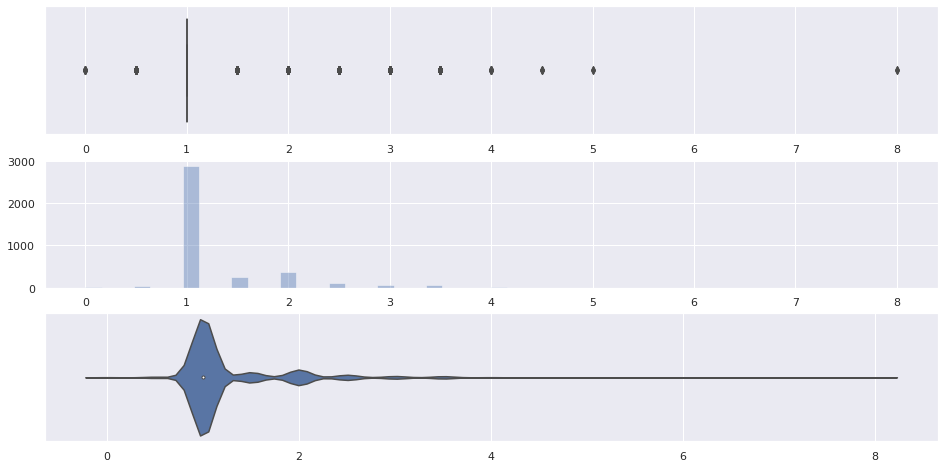

In [0]:
# Data Exploration for bathrooms_data
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(3, 1, figsize=(16, 8))

# Plot the basic uni-variate figures for price
sb.boxplot(bathrooms_data, orient = "h", ax = axes[0])
sb.distplot(bathrooms_data, kde = False, ax = axes[1])
sb.violinplot(bathrooms_data, ax = axes[2])

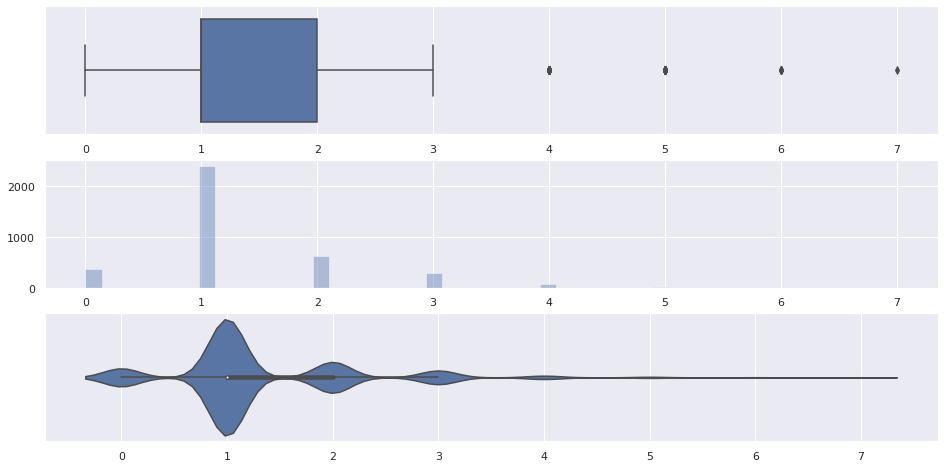

In [0]:
# Data Exploration for bedrooms_data
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(3, 1, figsize=(16, 8))

# Plot the basic uni-variate figures for price
sb.boxplot(bedrooms_data, orient = "h", ax = axes[0])
sb.distplot(bedrooms_data, kde = False, ax = axes[1])
sb.violinplot(bedrooms_data, ax = axes[2])

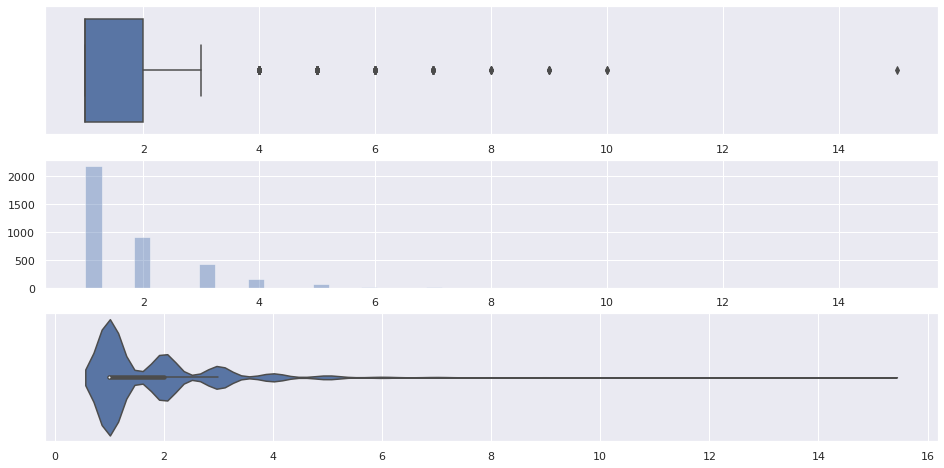

In [0]:
# Data Exploration for beds_data
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(3, 1, figsize=(16, 8))

# Plot the basic uni-variate figures for price
sb.boxplot(beds_data, orient = "h", ax = axes[0])
sb.distplot(beds_data, kde = False, ax = axes[1])
sb.violinplot(beds_data, ax = axes[2])

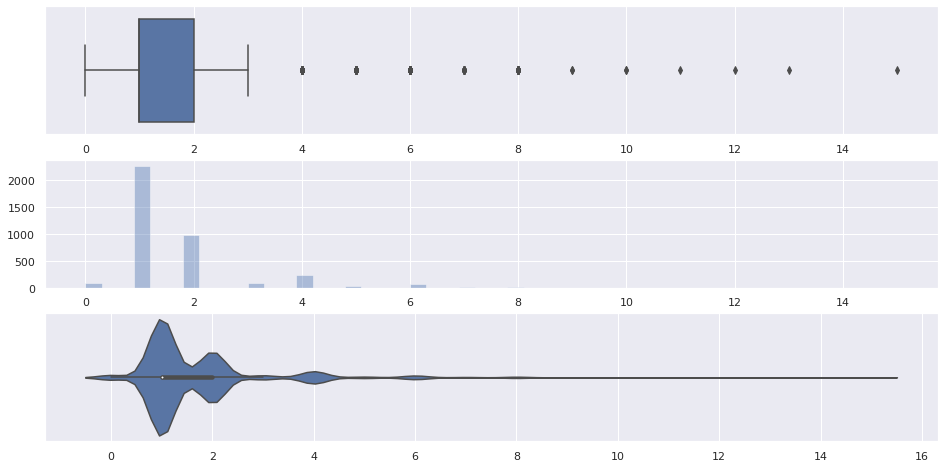

In [0]:
# Data Exploration for guests_data
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(3, 1, figsize=(16, 8))

# Plot the basic uni-variate figures for price
sb.boxplot(guests_data, orient = "h", ax = axes[0])
sb.distplot(guests_data, kde = False, ax = axes[1])
sb.violinplot(guests_data, ax = axes[2])

Price vs Accommodates

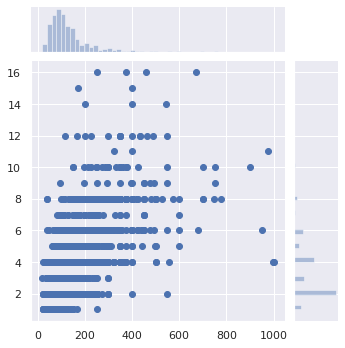

In [0]:
sb.jointplot(x = price_data, y = accommodates_data, height = 5)

In [0]:
price_accommodates_corrData = pd.DataFrame(num_variables_new[['price', 'accommodates']])
price_accommodates_corrData.head()

,price,accommodates
0,85.0,4
1,150.0,4
2,975.0,11
3,100.0,3
4,450.0,6


In [0]:
price_accommodates_corrData.describe()

,price,accommodates
count,3796.000000,3796.000000
mean,128.040569,3.350632
std,90.422043,1.980425
min,20.000000,1.000000
25%,75.000000,2.000000
50%,100.000000,3.000000
75%,150.000000,4.000000
max,1000.000000,16.000000


In [0]:
price_accommodates_corrData.corr()

,price,accommodates
price,1.000000,0.651988
accommodates,0.651988,1.000000


Price vs No. of Bathrooms

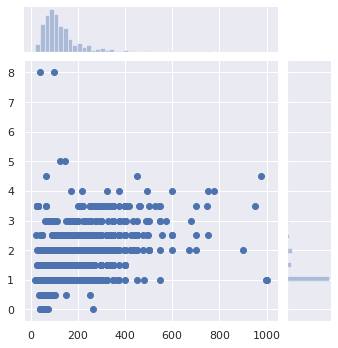

In [0]:
sb.jointplot(x = price_data, y = bathrooms_data, height = 5)

In [0]:
price_bathrooms_corrData = pd.DataFrame(num_variables_new[['price', 'bathrooms']])
price_bathrooms_corrData.head()

,price,bathrooms
0,85.0,1.0
1,150.0,1.0
2,975.0,4.5
3,100.0,1.0
4,450.0,2.0


In [0]:
price_bathrooms_corrData.describe()

,price,bathrooms
count,3796.000000,3796.000000
mean,128.040569,1.259879
std,90.422043,0.590745
min,20.000000,0.000000
25%,75.000000,1.000000
50%,100.000000,1.000000
75%,150.000000,1.000000
max,1000.000000,8.000000


In [0]:
price_bathrooms_corrData.corr()

,price,bathrooms
price,1.000000,0.516493
bathrooms,0.516493,1.000000


Price vs No. of Bedrooms

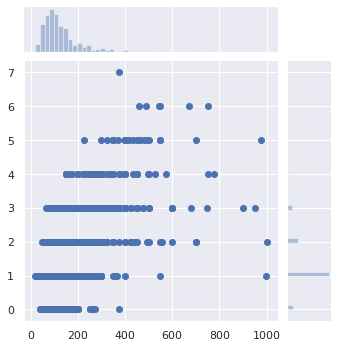

In [0]:
sb.jointplot(x = price_data, y = bedrooms_data, height = 5)

In [0]:
price_bedrooms_corrData = pd.DataFrame(num_variables_new[['price', 'bedrooms']])
price_bedrooms_corrData.head()

,price,bedrooms
0,85.0,1.0
1,150.0,1.0
2,975.0,5.0
3,100.0,0.0
4,450.0,3.0


In [0]:
price_bedrooms_corrData.describe()

,price,bedrooms
count,3796.000000,3796.000000
mean,128.040569,1.308219
std,90.422043,0.884858
min,20.000000,0.000000
25%,75.000000,1.000000
50%,100.000000,1.000000
75%,150.000000,2.000000
max,1000.000000,7.000000


In [0]:
price_bedrooms_corrData.corr()

,price,bedrooms
price,1.000000,0.628169
bedrooms,0.628169,1.000000


Price vs No. of Beds

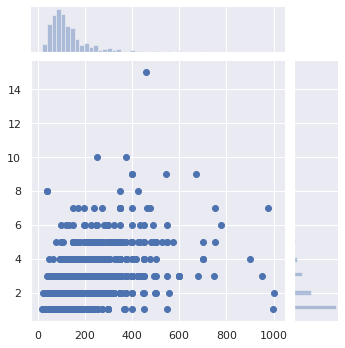

In [0]:
sb.jointplot(x = price_data, y = beds_data, height = 5)

In [0]:
price_beds_corrData = pd.DataFrame(num_variables_new[['price', 'beds']])
price_beds_corrData.head()

,price,beds
0,85.0,1.0
1,150.0,1.0
2,975.0,7.0
3,100.0,2.0
4,450.0,3.0


In [0]:
price_beds_corrData.describe()

,price,beds
count,3796.000000,3796.000000
mean,128.040569,1.736828
std,90.422043,1.140937
min,20.000000,1.000000
25%,75.000000,1.000000
50%,100.000000,1.000000
75%,150.000000,2.000000
max,1000.000000,15.000000


In [0]:
price_beds_corrData.corr()

,price,beds
price,1.000000,0.589683
beds,0.589683,1.000000


 Price vs No. of Guest

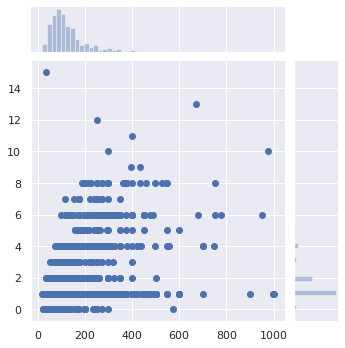

In [0]:
sb.jointplot(x = price_data, y = guests_data, height = 5)

In [0]:
price_guests_corrData = pd.DataFrame(num_variables_new[['price', 'guests_included']])
price_guests_corrData.head()

,price,guests_included
0,85.0,2
1,150.0,1
2,975.0,10
3,100.0,1
4,450.0,6


In [0]:
price_guests_corrData.describe()

,price,guests_included
count,3796.000000,3796.000000
mean,128.040569,1.674921
std,90.422043,1.313440
min,20.000000,0.000000
25%,75.000000,1.000000
50%,100.000000,1.000000
75%,150.000000,2.000000
max,1000.000000,15.000000


In [0]:
price_guests_corrData.corr()

,price,guests_included
price,1.000000,0.393398
guests_included,0.393398,1.000000


Summary of Correlations

Price vs:  
Accommodates 	= 0.651988  
Bathrooms	    = 0.516493  
Bedrooms	    = 0.628169  
Beds		      = 0.589683  
Guests		    = 0.393398  

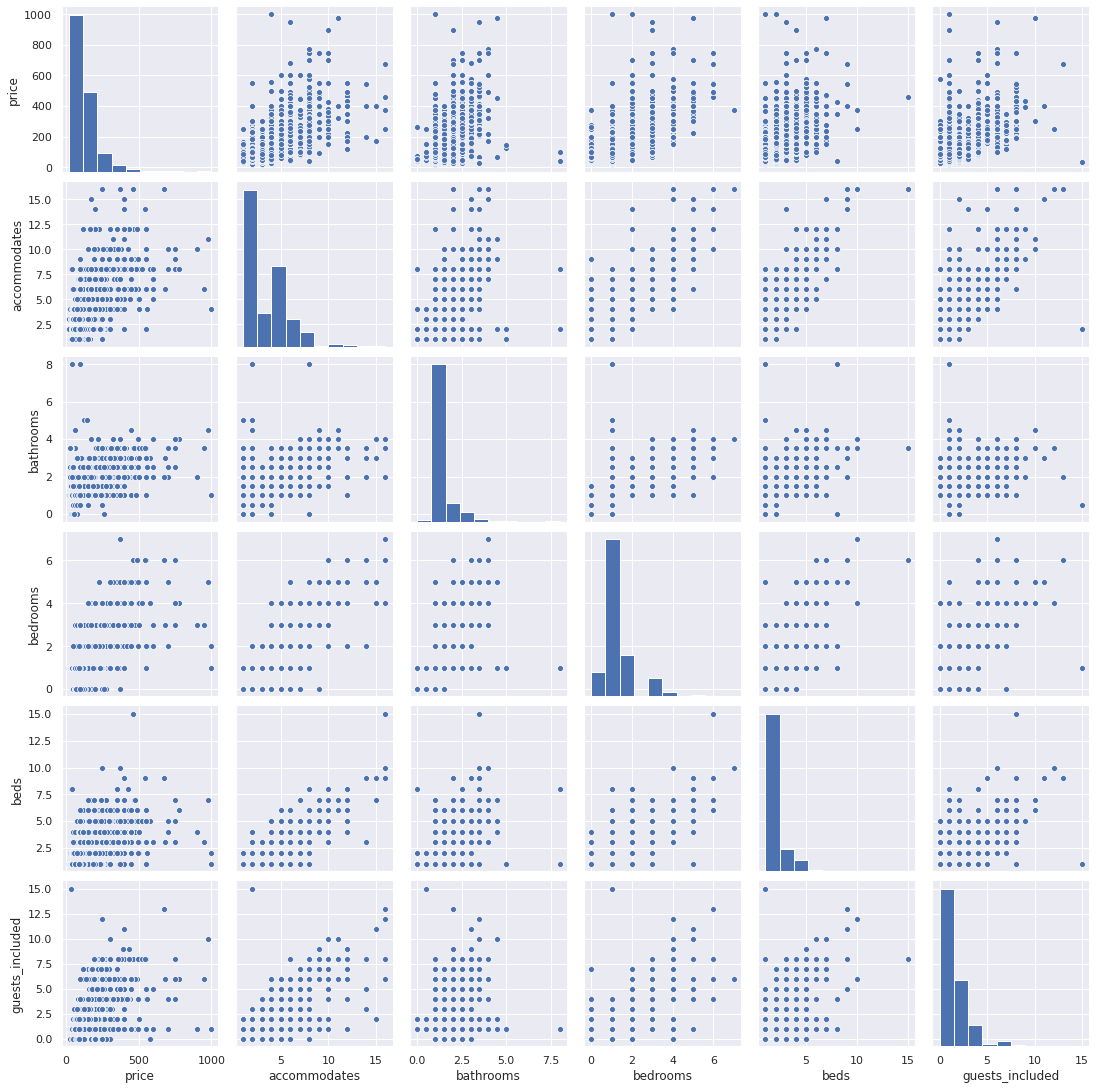

In [0]:
sb.pairplot(num_variables_new)

Splitting into Train and Test sets

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.metrics import mean_squared_error
dectree = DecisionTreeClassifier(max_depth = 5)

num_train, num_test = train_test_split(num_variables_new, test_size = 0.2)

price_train = pd.DataFrame(num_train['price'])
others_train = pd.DataFrame(num_train[['accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included']])

price_test = pd.DataFrame(num_test['price'])
others_test = pd.DataFrame(num_test[['accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included']])


#Checking test and train sets 
print('Price Train dims \t:', price_train.shape)
print('Others Train dims \t:', others_train.shape)
print('Price Test dims \t:', price_test.shape)
print('Others Test dims \t:', others_test.shape)

Price Train dims 	: (3036, 1)
Others Train dims 	: (3036, 5)
Price Test dims 	: (760, 1)
Others Test dims 	: (760, 5)


Linear Regression

Intercept of Regression 	: [5.96624122]
Coefficients of Regression 	: [[17.66677565 25.36256416 22.63725861 -1.48409001  2.86552864]]


Goodness of Fit of Model 	 Train Dataset
Explained Variance (R^2) 	: 0.4833933146189344
Mean Squared Error (MSE) 	: 4271.606680283923


Goodness of Fit of Model 	 Test Dataset
Explained Variance (R^2) 	: 0.47864725197618146
Mean Squared Error (MSE) 	: 4043.9601043767984




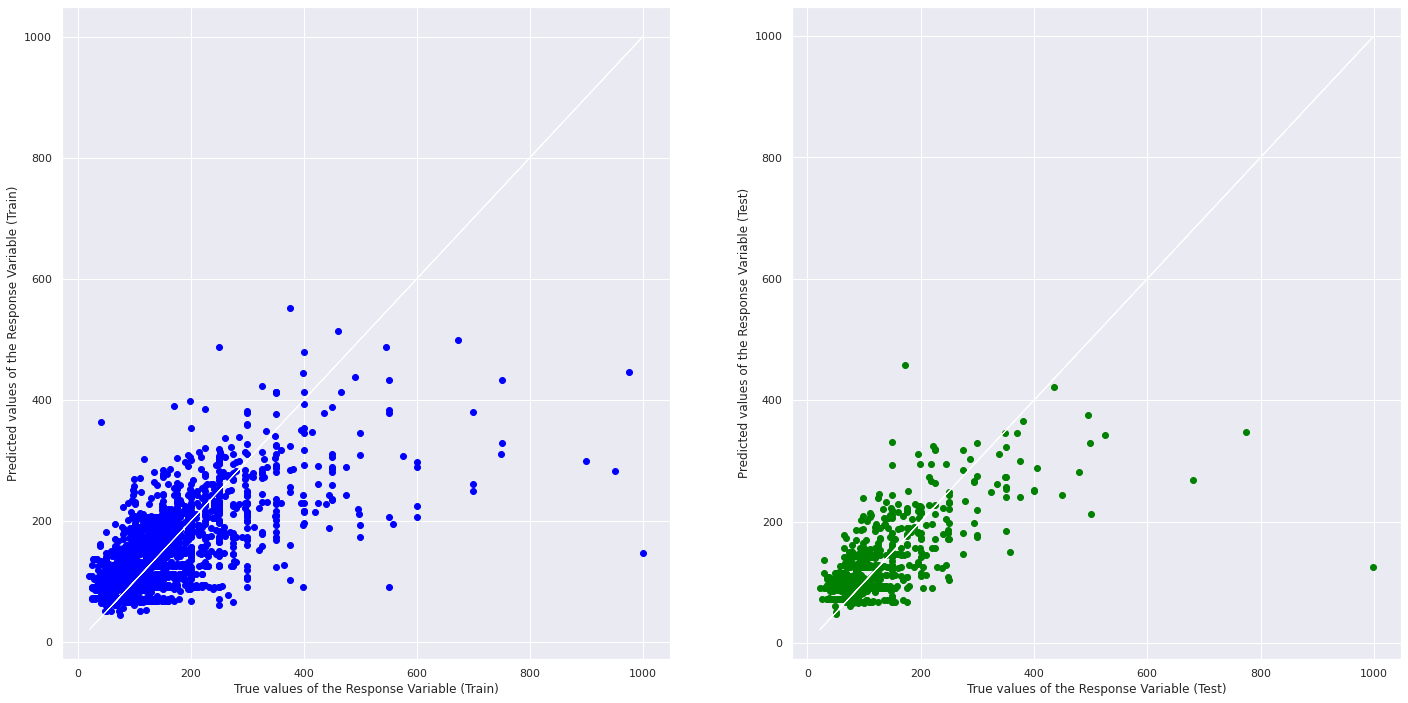

In [0]:
linreg = LinearRegression()
linreg.fit(others_train, price_train)

#Predicting price using: accommodates, bathrooms, bedrooms, beds, guest included
price_train_predict = linreg.predict(others_train)
price_test_predict  = linreg.predict(others_test)

#Intercept and Coefficients of Regression
print('Intercept of Regression \t:', linreg.intercept_)
print('Coefficients of Regression \t:', linreg.coef_)
print('\n')

#Check Goodness of Fit on Trian set
print('Goodness of Fit of Model \t Train Dataset')
print('Explained Variance (R^2) \t:', linreg.score(others_train, price_train))
print('Mean Squared Error (MSE) \t:', mean_squared_error(price_train, price_train_predict))
print('\n')

#Check Goodness of Fit on Test set
print('Goodness of Fit of Model \t Test Dataset')
print('Explained Variance (R^2) \t:', linreg.score(others_test, price_test))
print('Mean Squared Error (MSE) \t:', mean_squared_error(price_test, price_test_predict))
print('\n')

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(price_train, price_train_predict, color = "blue")
axes[0].plot(price_train, price_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(price_test, price_test_predict, color = "green")
axes[1].plot(price_test, price_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

Ordinary Least Squares (OLS) Regression

In [0]:
import statsmodels.api as sm
 
#Without a constant
model = sm.OLS(price_train, others_train).fit()
price_train_OLSpred = model.predict(others_train)

print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.829
Model:                            OLS   Adj. R-squared (uncentered):              0.829
Method:                 Least Squares   F-statistic:                              2940.
Date:                Thu, 09 Apr 2020   Prob (F-statistic):                        0.00
Time:                        09:28:55   Log-Likelihood:                         -17000.
No. Observations:                3036   AIC:                                  3.401e+04
Df Residuals:                    3031   BIC:                                  3.404e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

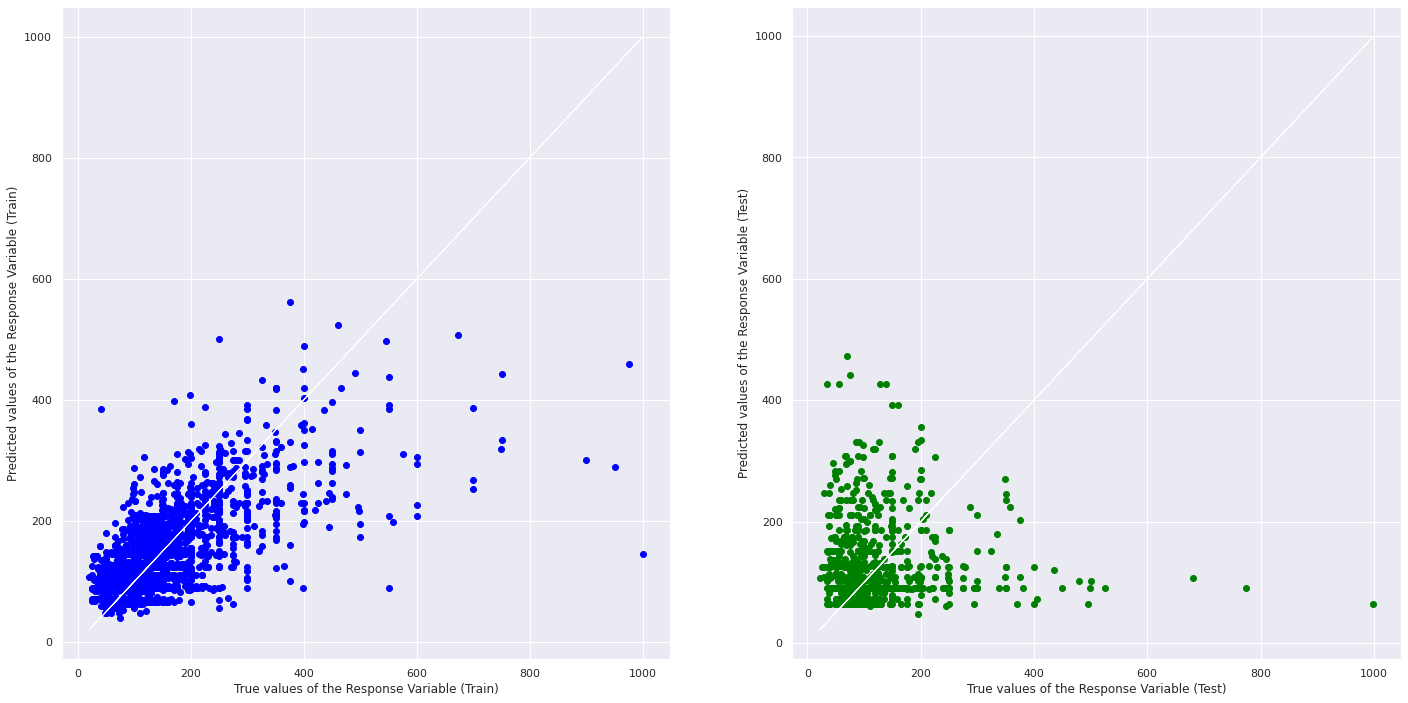

In [0]:
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(price_train, price_train_OLSpred, color = "blue")
axes[0].plot(price_train, price_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(price_test, price_test_OLSpred, color = "green")
axes[1].plot(price_test, price_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

In [0]:
#Predicting test set (Without a constant)

price_test_OLSpred = model.predict(others_test)

In [0]:
#With constant

others_train_with_constant = sm.add_constant(others_train)
model = sm.OLS(price_train, others_train_with_constant).fit()
price_train_OLSpred = model.predict(others_train_with_constant)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     567.0
Date:                Thu, 09 Apr 2020   Prob (F-statistic):               0.00
Time:                        09:28:56   Log-Likelihood:                -16998.
No. Observations:                3036   AIC:                         3.401e+04
Df Residuals:                    3030   BIC:                         3.404e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               5.9662      2.949     

In [0]:
#Predicting test set (With constant)
others_test_with_constant = sm.add_constant(others_test)
price_test_OLSpred = model.predict(others_test_with_constant)

Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

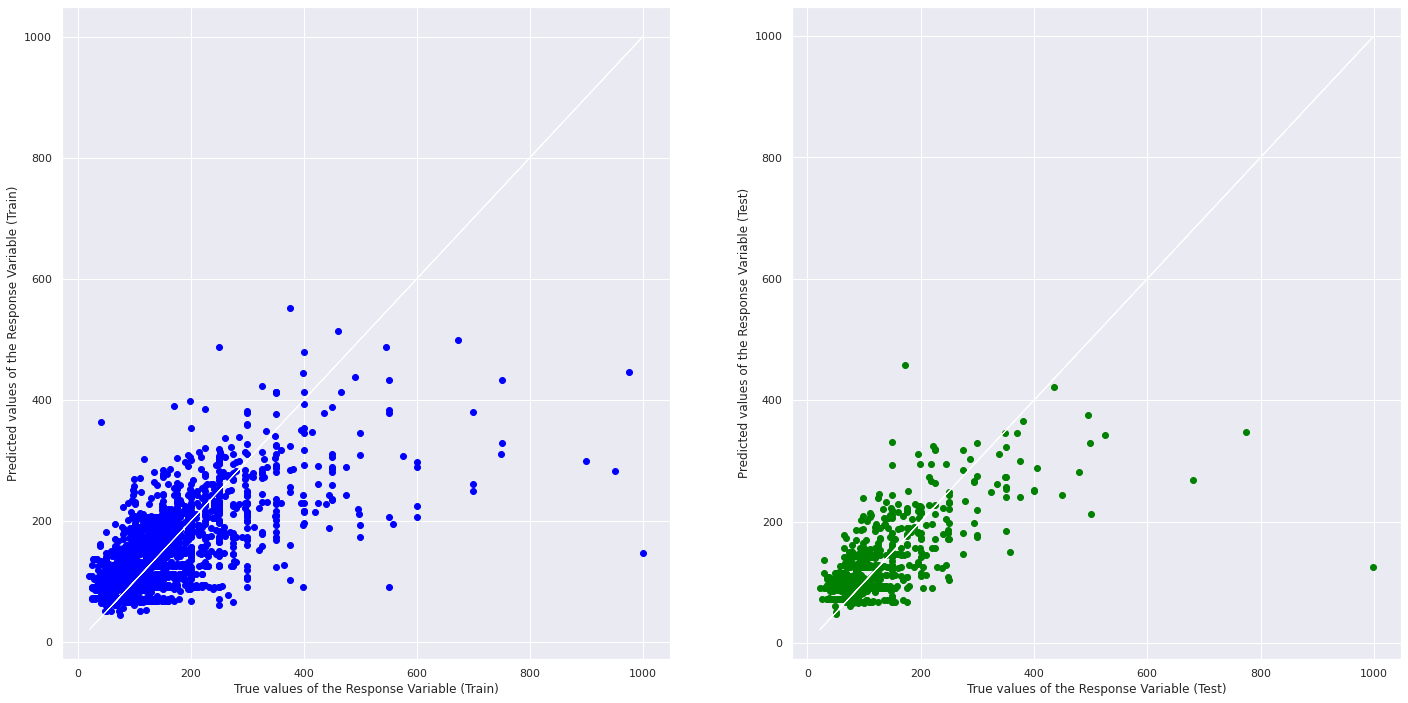

In [0]:
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(price_train, price_train_OLSpred, color = "blue")
axes[0].plot(price_train, price_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(price_test, price_test_OLSpred, color = "green")
axes[1].plot(price_test, price_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

Random Forest

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

forest = RandomForestRegressor(n_estimators=1000)

forest.fit(others_train, price_train)

#Predicting train and test sets using Random Forest 
price_train_forest_pred = forest.predict(others_train)
price_test_forest_pred = forest.predict(others_test)

print("Goodness of fit (Train set)")
print('Explained Variance (R^2) \t:', forest.score(others_train, price_train))
print('Mean Squared Error (MSE) \t:', mean_squared_error(price_train, price_train_forest_pred))
print('\n')
print("Goodness of fit (Test set)")
print('Explained Variance (R^2) \t:', forest.score(others_test, price_test))
print('Mean Squared Error (MSE) \t:', mean_squared_error(price_test, price_test_forest_pred))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Goodness of fit (Train set)
Explained Variance (R^2) 	: 0.702660649272274
Mean Squared Error (MSE) 	: 2458.575920176023


Goodness of fit (Test set)
Explained Variance (R^2) 	: 0.4224752902366797
Mean Squared Error (MSE) 	: 4479.667354640967
